In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_size, hidden_size, output_size = 2, 30, 1
learning_rate = 0.01
np.random.rand(0)
W1 = np.random.randn(input_size, hidden_size)  / np.sqrt(input_size) * np.sqrt(2)
W2 = np.random.randn(hidden_size, output_size)  / np.sqrt(hidden_size) * np.sqrt(2)

def relu(x):
    return x * (x > 0)

# 順伝播
def forward(phi):
    global W1
    global W2
    H = np.tanh(np.dot(phi, W1))
#     H = relu(np.dot(phi, W1))
    U = np.dot(H, W2)
    return U, H

# 逆伝播
def backward(phi, H, U, D): # 予測値、　隠れ層、　出力層、　教師
    global W1
    global W2
    error_output = U - D # 出力層の誤差
    error_hidden = (1 - H * H) * np.dot(W2, error_output) # 隠れ層の誤差 # tanh
#     error_hidden = (H > 0) * np.dot(W2, error_output) # 隠れ層の誤差 # relu
    W1 -= np.dot(phi.reshape(len(phi), 1), error_hidden.reshape(1, len(error_hidden))) * learning_rate
    W2 -= np.dot(H.reshape(len(H), 1), error_output.reshape(1, len(error_output))) * learning_rate

def g(phi, u):
    phi = np.array([phi])
    phi = np.insert(phi, 0, 1)
    # 順伝播＆逆伝播
    U, H =forward(phi)
    backward(phi, H, U, u) 
    return U, H

def g_dash(H):    
    tanh_dash = (1 - H * H)
    U_dash = np.dot(tanh_dash * W1, W2)
#     relu_dash = H > 0
#     U_dash = np.dot(relu_dash * W1, W2)
    return U_dash[1,0]

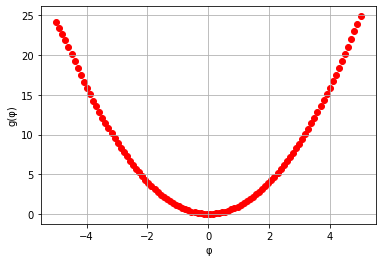

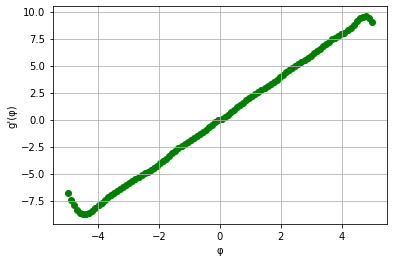

In [3]:
phis = np.linspace(-5, 5, 100)
np.random.shuffle(phis)
mlp_epoch = 1000


for loop in range(mlp_epoch):
    for phi in phis:
        u = phi * phi
        g(phi, u)

Us = []
U_dashs = []
for phi in phis:
    phi = np.array([phi])
    phi = np.insert(phi, 0, 1)
    U, H =forward(phi)
    Us.append(U)
    
    U_dash = g_dash(H)
    U_dashs.append(U_dash)

plt.scatter(phis, Us, color="r")
plt.xlabel("φ")
plt.ylabel("g(φ)")
plt.grid()
plt.show()

plt.scatter(phis, U_dashs, color="g")
plt.xlabel("φ")
plt.ylabel("g'(φ)")
plt.grid()
plt.show()

In [4]:
sigma_u = 1
vp = 5
sigma_p = 1
infer_time = 2000
epoch = 100
dt = 0.01
phi = list(range(infer_time))
ep = list(range(infer_time))
eu = list(range(infer_time))

# v = [np.random.randint(1, 5) for i in range(epoch)]
v = 3
u = v * v

/opt/conda/lib/python3.8/site-packages/numpy/ma/core.py:2826: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


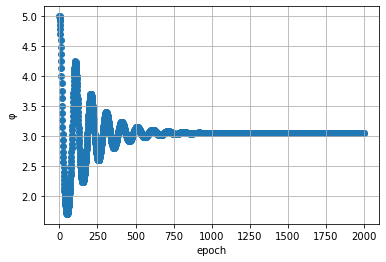

v: 3
phi: [3.056415]
u: 9
U: [9.31994306]


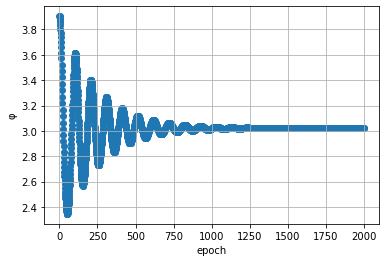

v: 3
phi: [3.0226844]
u: 9
U: [9.11622044]


In [5]:
for i in range(epoch):
#     u = v[i] * v[i]
    phi[0] = vp
    ep[0] = 0
    eu[0] = 0
    
    # 推測
    for j in range(1, infer_time):
        _phi = np.array([phi[j-1]])     
        _phi = np.insert(_phi, 0, 1)
        U, H = forward(_phi)
        U_dash = g_dash(H)
        phi[j] = phi[j-1] + dt * (-ep[j-1] + eu[j-1] * U_dash)
        ep[j] = ep[j-1] + dt * (phi[j-1] - vp - sigma_p * ep[j-1])
        eu[j] = eu[j-1] + dt * (u - U - sigma_u * eu[j-1])
          
    # 注意
    vp = vp + ep[-1] * dt
    sigma_p = max(sigma_p + 1/2 * (ep[-1] ** 2 - 1/sigma_p) * dt, 1)
    sigma_u = max(sigma_u + 1/2 * (eu[-1] ** 2 - 1/sigma_u) * dt, 1) 

    if i == 0 or i == epoch - 1:
        plt.scatter(range(infer_time), phi)
        plt.xlabel("epoch")
        plt.ylabel("φ")
        plt.plot()
        plt.grid()
        plt.show()
        
#         print("v:", v[i])
        print("v:", v)
        print("phi:", phi[-1])
        print("u:", u)
        print("U:", U)